# 
Задание: сборка PDF документа
Используя данные по посещаемости библиотек в районах Москвы
https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json
постройте круговую диаграмму суммарной посещаемости (NumOfVisitors) 20 наиболее популярных районов Москвы.
Создайте PDF отчет, используя файл
https://video.ittensive.com/python-advanced/title.pdf
как первую страницу. На второй странице выведите итоговую диаграмму, самый популярный район Москвы и число посетителей библиотек в нем.
Сколько посетителей библиотек в районе Москвы с самой большой суммарной посещаемостью библиотек? 765402

C:\Users\User\AppData\Local\Temp\ipykernel_19244\1775581966.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sum = data.groupby("District").sum().sort_values("NumOfVisitors",


AttributeError: 'Index' object has no attribute 'get_values'

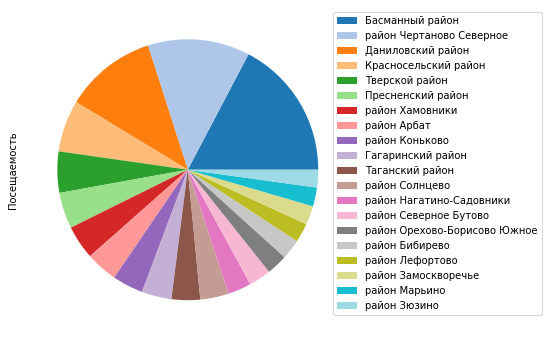

In [1]:
%matplotlib inline
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
from PyPDF2 import PdfFileMerger, PdfFileReader
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_district (x):
    return list(map(lambda a: a["District"], x))[0]

r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
data = pd.DataFrame(json.loads(r.content)).fillna(value=0)
data["District"] = data["ObjectAddress"].apply(extract_district)
data_sum = data.groupby("District").sum().sort_values("NumOfVisitors",
                                                     ascending=False)
fig = plt.figure(figsize=(11,6))
area = fig.add_subplot(1, 1, 1)
data_sum[0:20]["NumOfVisitors"].plot.pie(ax = area,
                                        labels=[""]*20,
                                        label="Посещаемость",
                                        cmap="tab20")
plt.legend(data_sum[0:20].index,
          bbox_to_anchor=(1.5,1,0.1,0))
plt.savefig("readers.png")

pdfmetrics.registerFont(TTFont("Trebuchet", "Trebuchet.ttf"))
PDF = canvas.Canvas("readers.pdf", pagesize=pagesizes.A4)
PDF.setFont("Trebuchet", 48)
PDF.drawString(70, 650, "Посетители библиотек")
PDF.drawString(80, 590, "по районам Москвы")
PDF.setFont("Trebuchet", 13)
PDF.drawString(550, 820, "2")
PDF.drawImage(ImageReader("readers.png"), -200, 150)
PDF.setFont("Trebuchet", 20)
PDF.drawString(100, 150, "Самый популярный район")
PDF.setFont("Trebuchet", 24)
PDF.drawString(100, 120, data_sum.index.get_values()[0])
PDF.setFont("Trebuchet", 20)
PDF.drawString(100, 90,
               "Посетителей: " + str(int(data_sum["NumOfVisitors"].values[0])))
PDF.save()
files = ["title.pdf", "readers.pdf"]
merger = PdfFileMerger()
for filename in files:
    merger.append(PdfFileReader(open(filename, "rb")))
merger.write("report.pdf")

C:\Users\User\AppData\Local\Temp\ipykernel_21144\4198523077.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sum = data.groupby("District").sum().sort_values("NumOfVisitors", ascending=False)


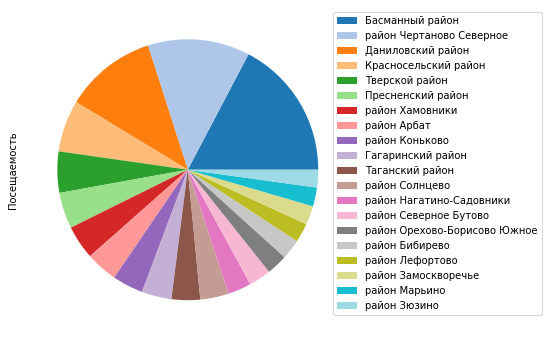

In [1]:
#Код для PyPDF версии 3
%matplotlib inline
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
from PyPDF2 import PdfMerger, PdfReader
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_district (x):
    return list(map(lambda a: a["District"], x))[0]

r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
data = pd.DataFrame(json.loads(r.content)).fillna(value=0)
data["District"] = data["ObjectAddress"].apply(extract_district)
data_sum = data.groupby("District").sum().sort_values("NumOfVisitors", ascending=False)
fig = plt.figure(figsize=(11,6))
area = fig.add_subplot(1, 1, 1)
data_sum[0:20]["NumOfVisitors"].plot.pie(ax = area, labels=[""]*20, label="Посещаемость", cmap="tab20")
plt.legend(data_sum[0:20].index, bbox_to_anchor=(1.5,1,0.1,0))
plt.savefig("readers.png")

pdfmetrics.registerFont(TTFont("Trebuchet", "Trebuchet.ttf"))
PDF = canvas.Canvas("readers.pdf", pagesize=pagesizes.A4)
PDF.setFont("Trebuchet", 48)
PDF.drawString(70, 650, "Посетители библиотек")
PDF.drawString(80, 590, "по районам Москвы")
PDF.setFont("Trebuchet", 13)
PDF.drawString(550, 820, "2")
PDF.drawImage(ImageReader("readers.png"), -200, 150)
PDF.setFont("Trebuchet", 20)
PDF.drawString(100, 150, "Самый популярный район")
PDF.setFont("Trebuchet", 24)
PDF.drawString(100, 120, data_sum.index[0])
PDF.setFont("Trebuchet", 20)
PDF.drawString(100, 90, "Посетителей: " + str(int(data_sum["NumOfVisitors"].values[0])))
PDF.save()
files = ["title.pdf", "readers.pdf"]
merger = PdfMerger()
for filename in files:
    merger.append(PdfReader(open(filename, "rb")))
merger.write("report.pdf")